In [46]:
import pandas as pd # for data wrangling purpose
import numpy as np # Basic computation library
import plotly
import seaborn as sns # For Visualization 
import matplotlib.pyplot as plt # ploting package

import warnings # Filtering warnings
warnings.filterwarnings('ignore')

**Data Preparation**

In [47]:
data = pd.read_csv('water_potability.csv')
df = pd.DataFrame(data)
df.head(3)

,ph,Hardness,Solids,Chloramines,Sulfate,Conductivity,Organic_carbon,Trihalomethanes,Turbidity,Potability
0,NaN,204.890455,20791.318981,7.300212,368.516441,564.308654,10.379783,86.990970,2.963135,0
1,3.716080,129.422921,18630.057858,6.635246,NaN,592.885359,15.180013,56.329076,4.500656,0
2,8.099124,224.236259,19909.541732,9.275884,NaN,418.606213,16.868637,66.420093,3.055934,0


In [48]:
df.describe()

,ph,Hardness,Solids,Chloramines,Sulfate,Conductivity,Organic_carbon,Trihalomethanes,Turbidity,Potability
count,2785.000000,3276.000000,3276.000000,3276.000000,2495.000000,3276.000000,3276.000000,3114.000000,3276.000000,3276.000000
mean,7.080795,196.369496,22014.092526,7.122277,333.775777,426.205111,14.284970,66.396293,3.966786,0.390110
std,1.594320,32.879761,8768.570828,1.583085,41.416840,80.824064,3.308162,16.175008,0.780382,0.487849
min,0.000000,47.432000,320.942611,0.352000,129.000000,181.483754,2.200000,0.738000,1.450000,0.000000
25%,6.093092,176.850538,15666.690297,6.127421,307.699498,365.734414,12.065801,55.844536,3.439711,0.000000
50%,7.036752,196.967627,20927.833607,7.130299,333.073546,421.884968,14.218338,66.622485,3.955028,0.000000
75%,8.062066,216.667456,27332.762127,8.114887,359.950170,481.792304,16.557652,77.337473,4.500320,1.000000
max,14.000000,323.124000,61227.196008,13.127000,481.030642,753.342620,28.300000,124.000000,6.739000,1.000000


In [49]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3276 entries, 0 to 3275
Data columns (total 10 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   ph               2785 non-null   float64
 1   Hardness         3276 non-null   float64
 2   Solids           3276 non-null   float64
 3   Chloramines      3276 non-null   float64
 4   Sulfate          2495 non-null   float64
 5   Conductivity     3276 non-null   float64
 6   Organic_carbon   3276 non-null   float64
 7   Trihalomethanes  3114 non-null   float64
 8   Turbidity        3276 non-null   float64
 9   Potability       3276 non-null   int64  
dtypes: float64(9), int64(1)
memory usage: 256.1 KB


In [50]:
df.isnull().sum()

ph                 491
Hardness             0
Solids               0
Chloramines          0
Sulfate            781
Conductivity         0
Organic_carbon       0
Trihalomethanes    162
Turbidity            0
Potability           0
dtype: int64

In [51]:
df.shape

(3276, 10)

In [52]:
df.nunique()

ph                 2785
Hardness           3276
Solids             3276
Chloramines        3276
Sulfate            2495
Conductivity       3276
Organic_carbon     3276
Trihalomethanes    3114
Turbidity          3276
Potability            2
dtype: int64

In [53]:
df['Potability'].value_counts()

Potability
0    1998
1    1278
Name: count, dtype: int64

<Axes: xlabel='Potability', ylabel='count'>

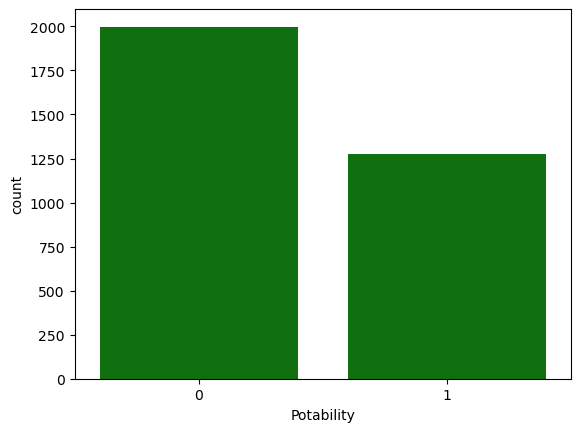

In [54]:
sns.countplot(data = df, x = 'Potability', color = "g")

<Axes: ylabel='count'>

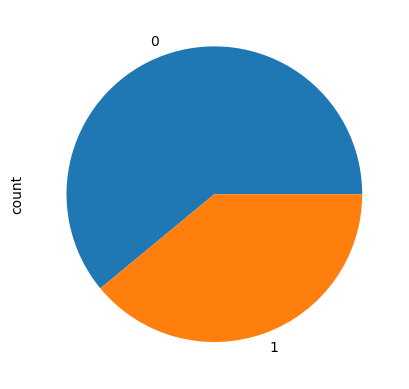

In [55]:
df.Potability.value_counts().plot(kind = 'pie')

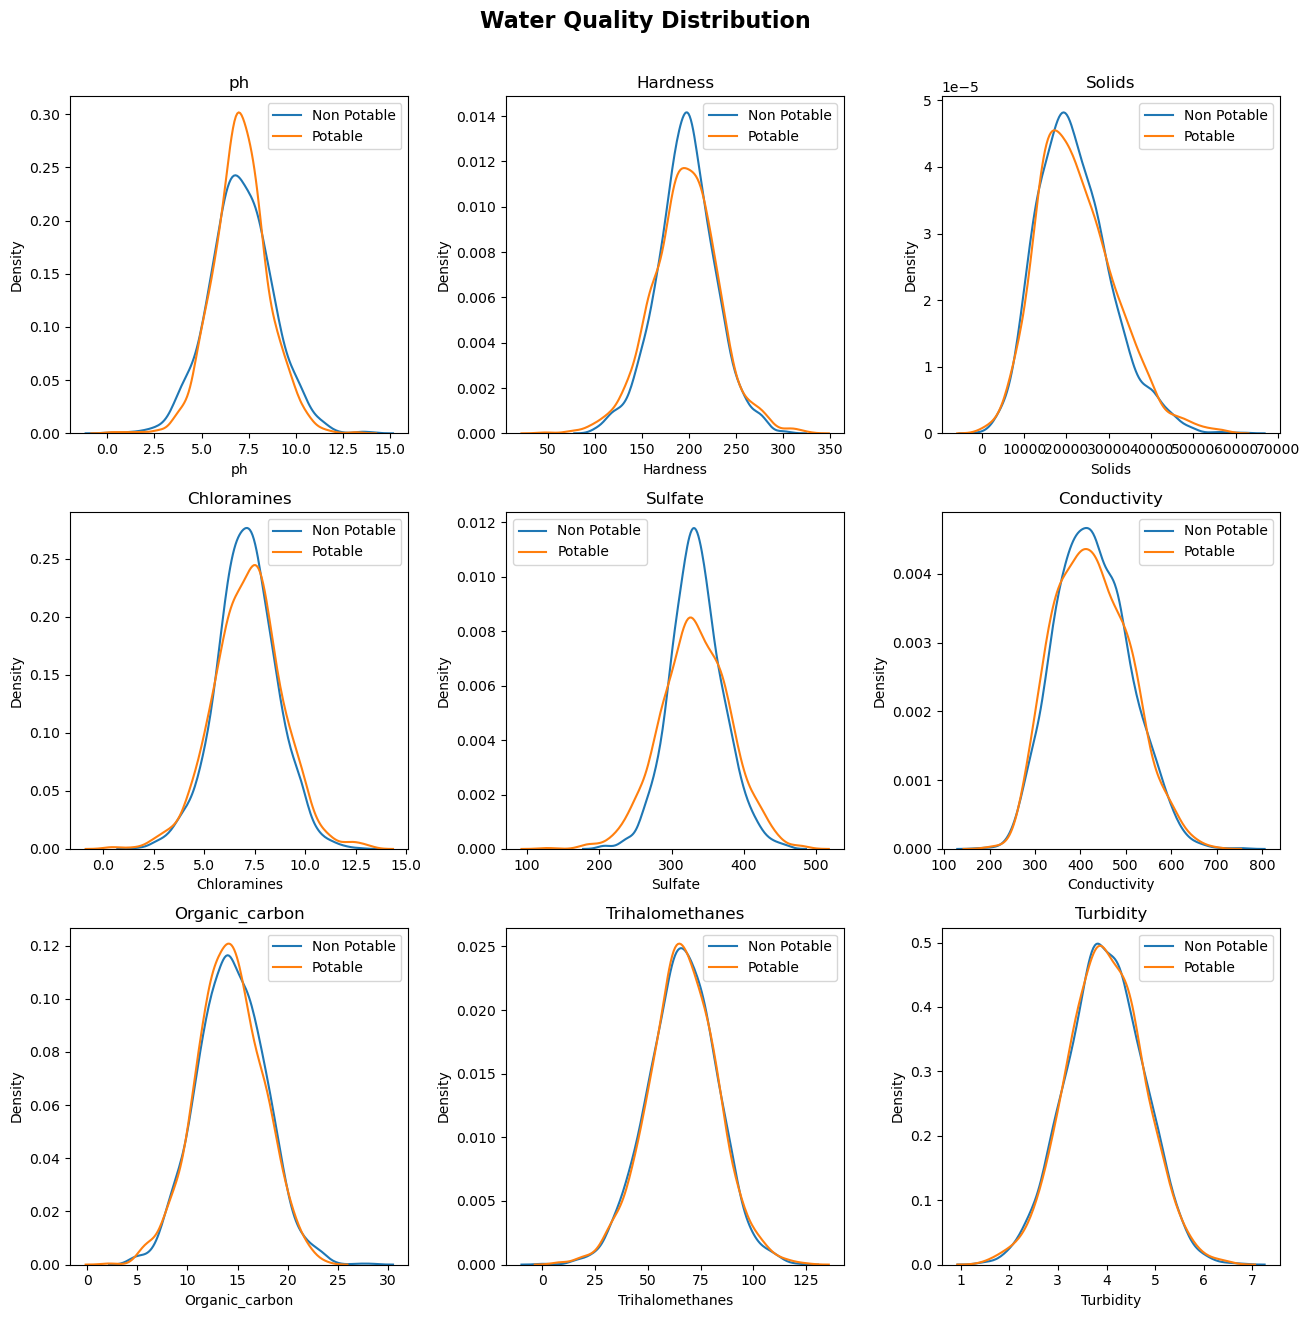

In [56]:
non_potable = df[df['Potability'] == 0]
potable = df[df['Potability'] ==1]
plt.figure(figsize = (13,13))

for ax, col in enumerate(df.columns[:9]):
    plt.subplot(3,3,ax+1)
    plt.title(col)
    sns.kdeplot(x = non_potable[col], label = 'Non Potable')
    sns.kdeplot(x = potable[col], label = 'Potable')
    plt.legend()

plt.suptitle('Water Quality Distribution', y=1.01, size = 16, color = 'black', weight = 'bold')
plt.tight_layout()

In [57]:
df.drop('Potability', axis = 1).skew()

ph                 0.025630
Hardness          -0.039342
Solids             0.621634
Chloramines       -0.012098
Sulfate           -0.035947
Conductivity       0.264490
Organic_carbon     0.025533
Trihalomethanes   -0.083031
Turbidity         -0.007817
dtype: float64

In [58]:
df.corr()

,ph,Hardness,Solids,Chloramines,Sulfate,Conductivity,Organic_carbon,Trihalomethanes,Turbidity,Potability
ph,1.000000,0.082096,-0.089288,-0.034350,0.018203,0.018614,0.043503,0.003354,-0.039057,-0.003556
Hardness,0.082096,1.000000,-0.046899,-0.030054,-0.106923,-0.023915,0.003610,-0.013013,-0.014449,-0.013837
Solids,-0.089288,-0.046899,1.000000,-0.070148,-0.171804,0.013831,0.010242,-0.009143,0.019546,0.033743
Chloramines,-0.034350,-0.030054,-0.070148,1.000000,0.027244,-0.020486,-0.012653,0.017084,0.002363,0.023779
Sulfate,0.018203,-0.106923,-0.171804,0.027244,1.000000,-0.016121,0.030831,-0.030274,-0.011187,-0.023577
Conductivity,0.018614,-0.023915,0.013831,-0.020486,-0.016121,1.000000,0.020966,0.001285,0.005798,-0.008128
Organic_carbon,0.043503,0.003610,0.010242,-0.012653,0.030831,0.020966,1.000000,-0.013274,-0.027308,-0.030001
Trihalomethanes,0.003354,-0.013013,-0.009143,0.017084,-0.030274,0.001285,-0.013274,1.000000,-0.022145,0.007130
Turbidity,-0.039057,-0.014449,0.019546,0.002363,-0.011187,0.005798,-0.027308,-0.022145,1.000000,0.001581
Potability,-0.003556,-0.013837,0.033743,0.023779,-0.023577,-0.008128,-0.030001,0.007130,0.001581,1.000000


Text(0.5, 0.92, 'Water Quality Heat Map')

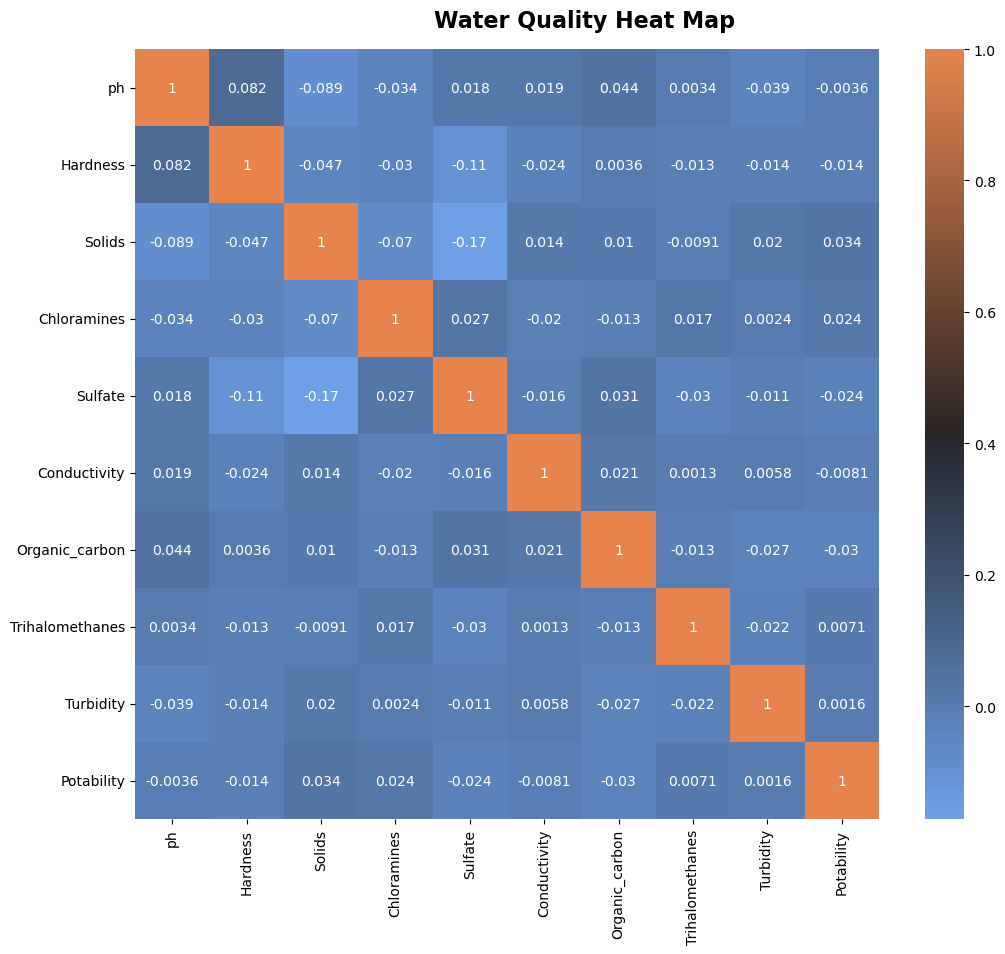

In [59]:
plt.figure(figsize = (12, 10))
cmap = sns.diverging_palette(250, 30, l=65, center = "dark", as_cmap = True)
sns.heatmap(df.corr(), annot = True, cmap = cmap)
plt.suptitle('Water Quality Heat Map', y=0.92, size = 16, color = 'black', weight = 'bold')

In [60]:
df.corr().abs()['Potability'].sort_values(ascending = False)

Potability         1.000000
Solids             0.033743
Organic_carbon     0.030001
Chloramines        0.023779
Sulfate            0.023577
Hardness           0.013837
Conductivity       0.008128
Trihalomethanes    0.007130
ph                 0.003556
Turbidity          0.001581
Name: Potability, dtype: float64

Text(0.5, 1.01, 'Water Quality Pair-Plot')

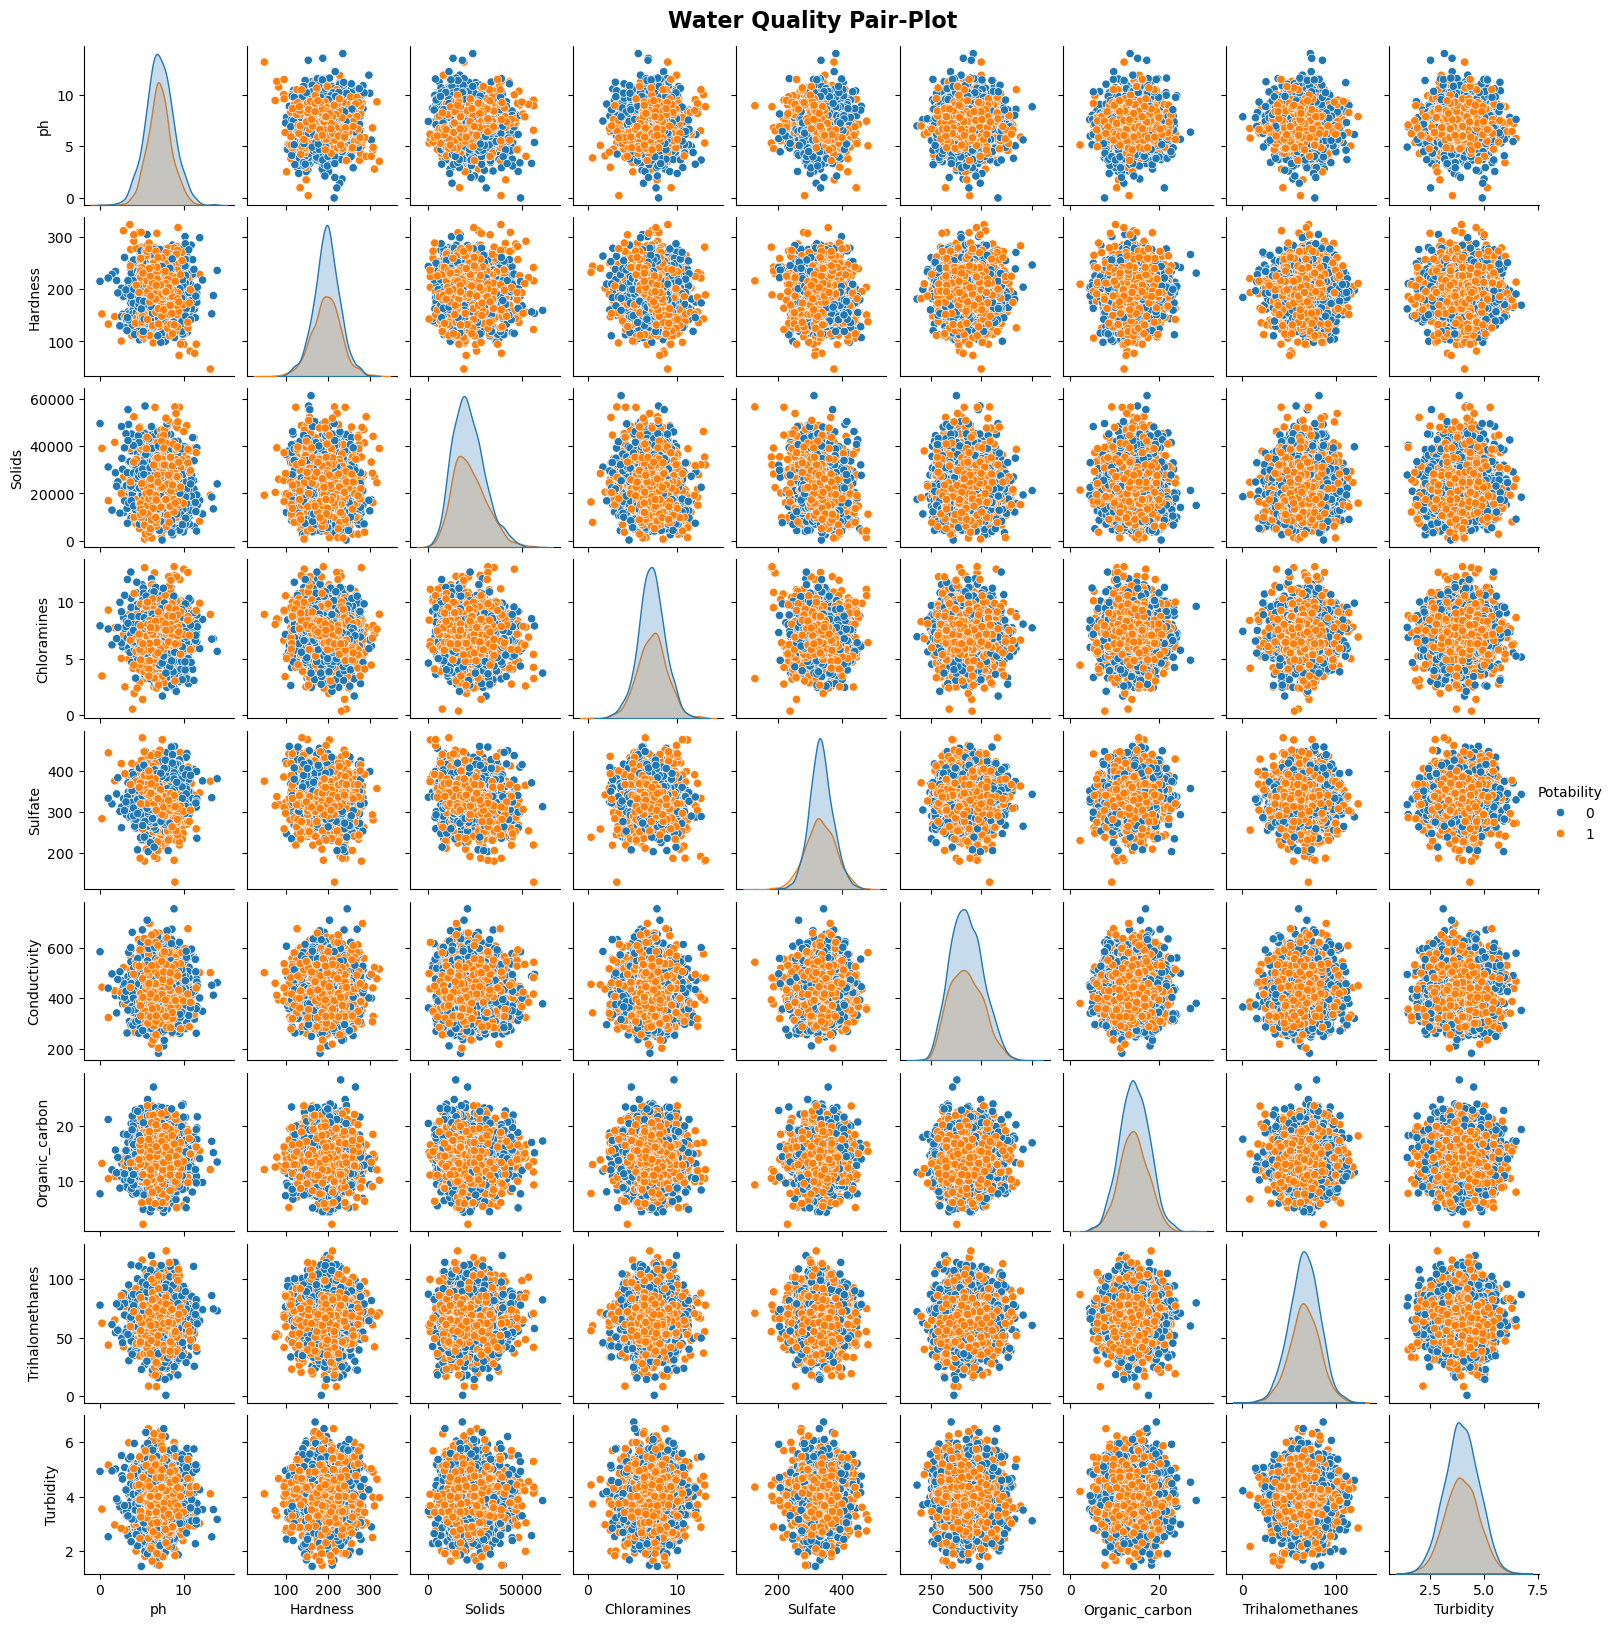

In [61]:
ax = sns.pairplot(df, hue = 'Potability', diag_kind = 'kde', kind = 'scatter')
ax.fig.set_size_inches(16,16)
ax.fig.suptitle('Water Quality Pair-Plot', y = 1.01, size=16, color='black', weight = 'bold')

Both the correlation heatmap and pairplots between the variables show that there are no clear 
linear relationships between the features and the target variable. We can rule out using a simple
linear model.

Text(0.5, 1.01, 'Water Quality Box-Plot')

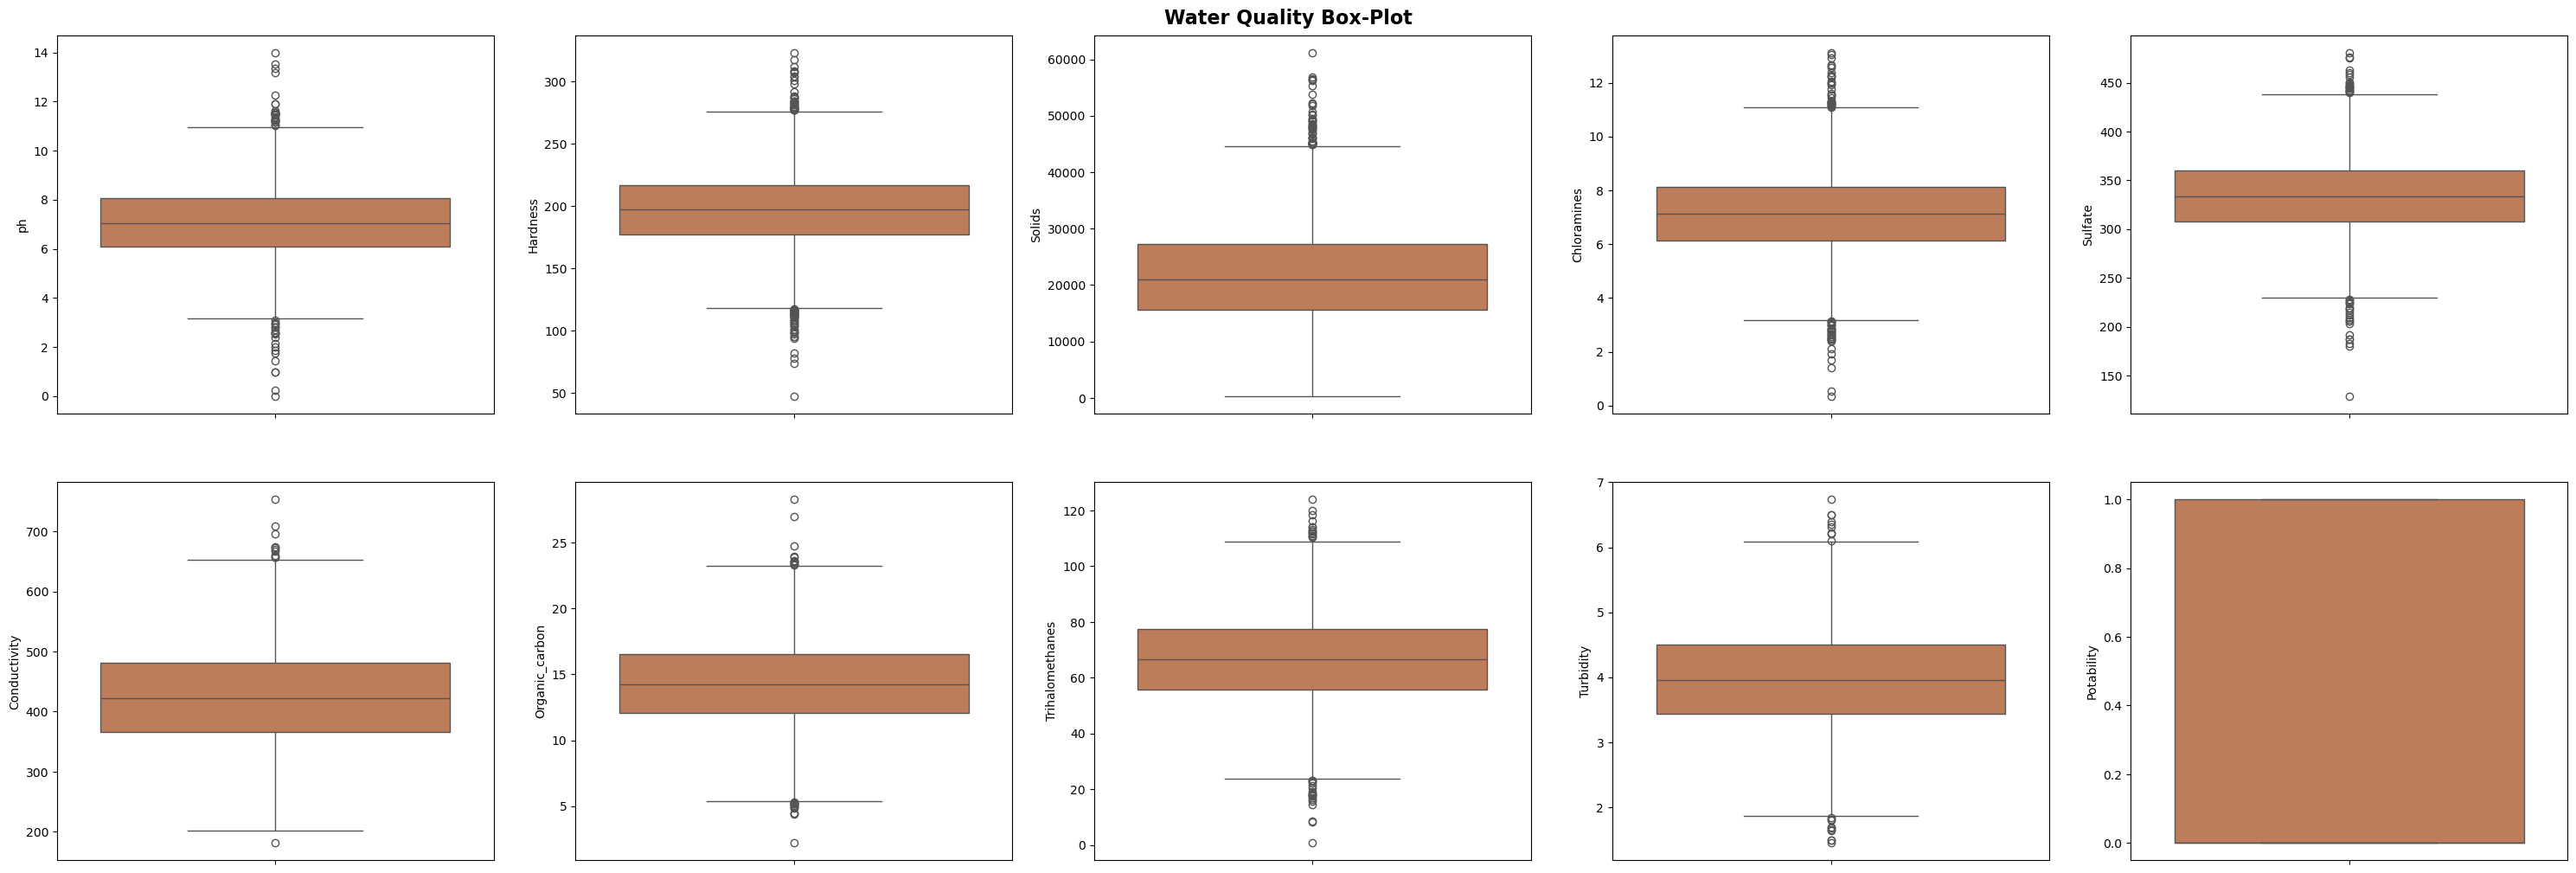

In [62]:
fig, ax = plt.subplots(ncols = 5, nrows = 2, figsize = (30,10))
index = 0
ax = ax.flatten()

for attributeCol, value in df.items():
    sns.boxplot(y=attributeCol, data=df, ax=ax[index], color='#cf7849')
    index += 1
plt.tight_layout(pad=1.5, w_pad=1.5, h_pad=5.0)

plt.suptitle('Water Quality Box-Plot', y=1.01, size =16, color = 'black', weight = 'bold')

There are outliers within every feature of the dataset.

Dealing with Missing Values

In [63]:
df.isna()

,ph,Hardness,Solids,Chloramines,Sulfate,Conductivity,Organic_carbon,Trihalomethanes,Turbidity,Potability
0,True,False,False,False,False,False,False,False,False,False
1,False,False,False,False,True,False,False,False,False,False
2,False,False,False,False,True,False,False,False,False,False
3,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...
3271,False,False,False,False,False,False,False,False,False,False
3272,False,False,False,False,True,False,False,True,False,False
3273,False,False,False,False,True,False,False,False,False,False
3274,False,False,False,False,True,False,False,False,False,False


In [64]:
df.isna().any()

ph                  True
Hardness           False
Solids             False
Chloramines        False
Sulfate             True
Conductivity       False
Organic_carbon     False
Trihalomethanes     True
Turbidity          False
Potability         False
dtype: bool

In [65]:
df.isna().any().any()

True

In [66]:
df.isnull().sum()

ph                 491
Hardness             0
Solids               0
Chloramines          0
Sulfate            781
Conductivity         0
Organic_carbon       0
Trihalomethanes    162
Turbidity            0
Potability           0
dtype: int64

Text(0.5, 1.0, 'Missing Data in Percentage')

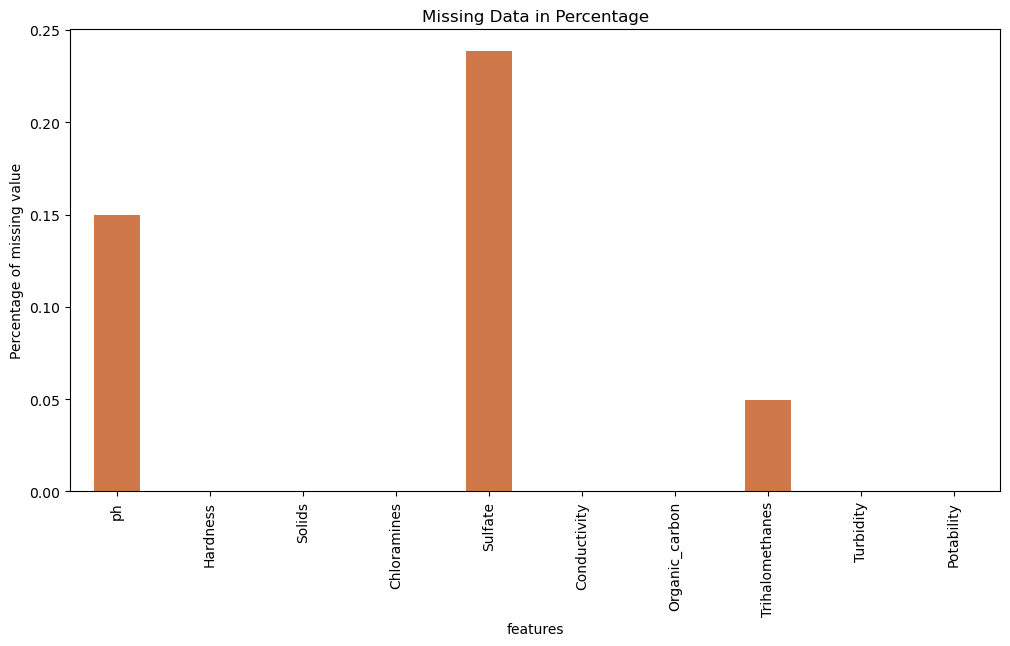

In [67]:
df.isnull().mean().plot.bar(figsize = (12,6), color = '#cf7849')
plt.ylabel('Percentage of missing value')
plt.xlabel('features')
plt.title('Missing Data in Percentage')

In [68]:
df.isnull().mean()*100

ph                 14.987790
Hardness            0.000000
Solids              0.000000
Chloramines         0.000000
Sulfate            23.840049
Conductivity        0.000000
Organic_carbon      0.000000
Trihalomethanes     4.945055
Turbidity           0.000000
Potability          0.000000
dtype: float64

In [69]:
df[df['Potability'] == 0][['ph', 'Sulfate', 'Trihalomethanes']].mean()

ph                   7.085378
Sulfate            334.564290
Trihalomethanes     66.303555
dtype: float64

In [70]:
df[df['Potability'] ==1][['ph', 'Sulfate', 'Trihalomethanes']].mean()

ph                   7.073783
Sulfate            332.566990
Trihalomethanes     66.539684
dtype: float64

The three features with missing values all have Gaussian distribution therefore it is a safe assumption
to use the mean of each feature to fill in for the missing values.

In [71]:
df1 = df.copy()
df1['ph'].fillna(value = df1['ph'].mean(), inplace = True)
df1['Sulfate'].fillna(value = df1['Sulfate'].mean(), inplace = True)
df1['Trihalomethanes'].fillna(value = df1['Trihalomethanes'].mean(), inplace=True)

In [72]:
df1.isnull().sum()

ph                 0
Hardness           0
Solids             0
Chloramines        0
Sulfate            0
Conductivity       0
Organic_carbon     0
Trihalomethanes    0
Turbidity          0
Potability         0
dtype: int64

Dealing with Outliers

Since the features have Gaussian distribution we can trim out the outliers data outside of 3 standard deviations.

In [73]:
# zscore

from scipy import stats
df_water = df1.copy()
df_water = df_water[(np.abs(stats.zscore(df1)) <= 3).all(axis = 1)]

In [74]:
df_water.shape

(3128, 10)

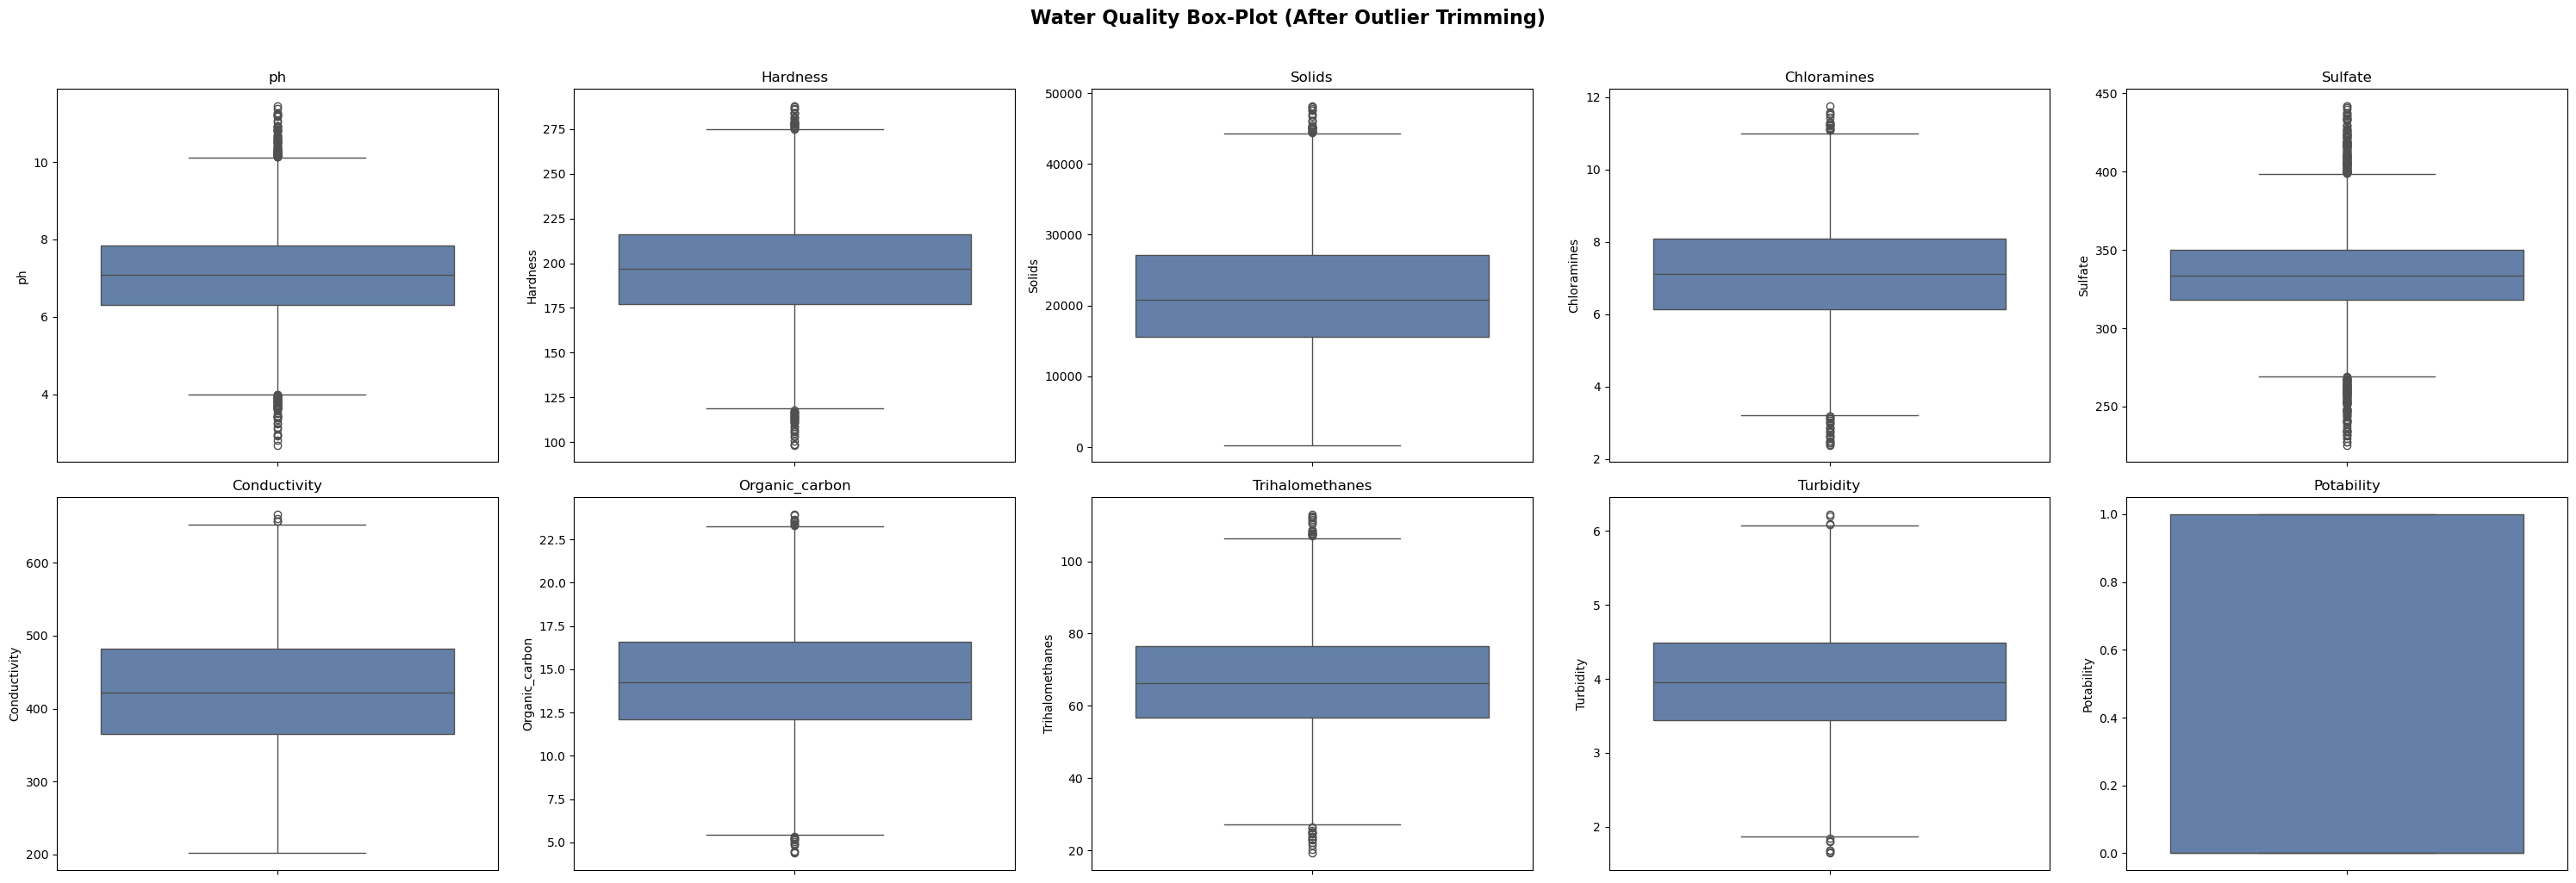

In [80]:
fig, ax = plt.subplots(2, 5, figsize=(30, 10))
ax = ax.flatten()

for i, col in enumerate(df_water.columns[:10]):
    sns.boxplot(y=df_water[col], ax=ax[i], color='#597eb3')
    ax[i].set_title(col)

plt.suptitle('Water Quality Box-Plot (After Outlier Trimming)', y=1.02, fontsize=16, weight='bold')
plt.tight_layout()
plt.show()

Dealing with Class Imbalance

In [81]:
count_class_0, count_class_1 = df_water.Potability.value_counts()

df_class_0 = df_water[df_water['Potability'] == 0]
df_class_1 = df_water[df_water['Potability'] == 1]

Random over-sampling: 
Potability
0    1930
1    1930
Name: count, dtype: int64


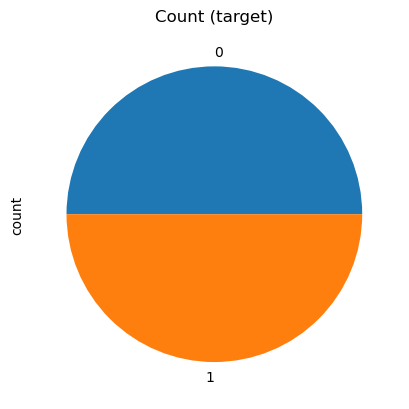

In [83]:
df_class_1_over = df_class_1.sample(count_class_0, replace = True)
df_test_over = pd.concat([df_class_0, df_class_1_over], axis = 0)

print('Random over-sampling: ')
print(df_test_over.Potability.value_counts())

df_test_over.Potability.value_counts().plot(kind = 'pie', title = 'Count (target)');

In [84]:
def FunctionAnova(inpData, TargetVariable, attributeList):
    from scipy.stats import f_oneway
    SelectedPredictors = []
    for predictor in attributeList:
        CategoryGroupLists = inpData.groupby(TargetVariable)[predictor].apply(list)
        AnovaResults = f_oneway(*CategoryGroupLists)
        
        # If p-value < 0.05, that means we reject H0
        if(AnovaResults[1] < 0.05):
            print(predictor, 'is correlated with', TargetVariable, ', P-Value:', AnovaResults[1])
            SelectedPredictors.append(predictor)
        else:
            print(predictor, 'is NOT correlated with', TargetVariable, ', P-Value', AnovaResults[1])
    return(SelectedPredictors)

In [85]:
# ph                
# Hardness            
# Solids              
# Chloramines         
# Sulfate            
# Conductivity        
# Organic_carbon      
# Trihalomethanes     
# Turbidity  

attributeColList = ['ph', 'Hardness', 'Solids', 'Chloramines', 'Sulfate', 'Conductivity', 'Organic_carbon', 'Trihalomethanes', 'Turbidity']
FunctionAnova(inpData = df_water, TargetVariable = 'Potability', attributeList = attributeColList)

ph is NOT correlated with Potability , P-Value 0.7393007692679345
Hardness is NOT correlated with Potability , P-Value 0.5152019551100953
Solids is NOT correlated with Potability , P-Value 0.24376029399252427
Chloramines is NOT correlated with Potability , P-Value 0.38895878135633166
Sulfate is NOT correlated with Potability , P-Value 0.8121224592001397
Conductivity is NOT correlated with Potability , P-Value 0.67278748123374
Organic_carbon is NOT correlated with Potability , P-Value 0.29594883023494456
Trihalomethanes is NOT correlated with Potability , P-Value 0.6801397413373995
Turbidity is NOT correlated with Potability , P-Value 0.8294778118624652


[]

ANOVA testing determine that there not any features that correlate with the target variable Potability with an acceptable P-Value.

Preprocessing: Train-Test-Split and standardized scaler

In [86]:
from sklearn.model_selection import train_test_split

X = df_test_over.drop('Potability', axis = 1)
y = df_test_over['Potability']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 42)

In [87]:
from sklearn.preprocessing import StandardScaler
scale = StandardScaler()
X_train = scale.fit_transform(X_train)
X_test = scale.transform(X_test)

In [89]:
print('X_train', X_train.shape, '\ny_train)', y_train.shape)
print('X_test', X_test.shape, '\ny_test', y_test.shape)

X_train (3088, 9) 
y_train) (3088,)
X_test (772, 9) 
y_test (772,)


Exploring dimensionality reduction using PCA

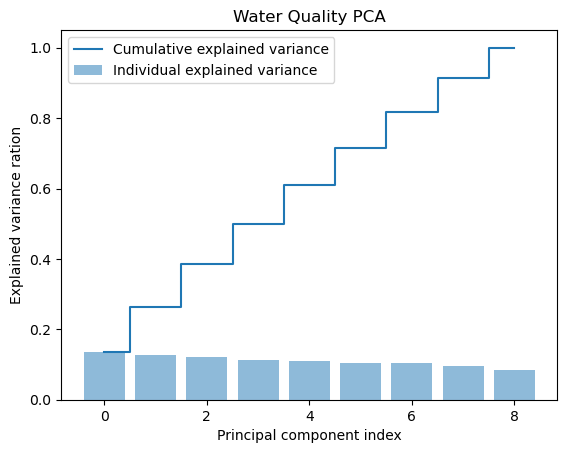

In [92]:
from sklearn.decomposition import PCA
pca = PCA()
X_train_pca = pca.fit_transform(X_train)
exp_var_pca = pca.explained_variance_ratio_

cum_sum_eigenvalues = np.cumsum(exp_var_pca)

plt.bar(range(0, len(exp_var_pca)), exp_var_pca, alpha = 0.5, align = 'center', label = 'Individual explained variance')
plt.step(range(0, len(cum_sum_eigenvalues)),cum_sum_eigenvalues, where = 'mid', label = 'Cumulative explained variance')
plt.ylabel('Explained variance ration')
plt.xlabel('Principal component index')
plt.title('Water Quality PCA')
plt.legend(loc = 'best')
plt.show()

PCA tells us that all the features are independent and confirm our previous observations from the correlation matrix and heatmap that there are not linear relationships between the features. This PCA analysis of explained variance ratio tells us that we would still need 8 components to explain 80% of the variance. Therefore, dimensionality reduction will not be beneficial with this dataset.

Model Training -- First Iteration

In [98]:
from sklearn.metrics import precision_score, recall_score, f1_score, accuracy_score, mean_absolute_error, mean_squared_error, confusion_matrix, classification_report

from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier

**1. Logistic Regression -- First Iteration**

In [99]:
LogReg = LogisticRegression()
LogReg.fit(X_train, y_train)
LogReg_pred = LogReg.predict(X_test)
LogReg_acc = accuracy_score(y_test, LogReg_pred)
LogReg_mae = mean_absolute_error(y_test, LogReg_pred)
LogReg_mse = mean_squared_error(y_test, LogReg_pred)
LogReg_rmse = np.sqrt(mean_squared_error(y_test, LogReg_pred))
LogReg_precision = precision_score(y_test, LogReg_pred)
LogReg_recall = recall_score(y_test, LogReg_pred)
LogReg_f1 = f1_score(y_test, LogReg_pred)

In [100]:
print('The accuracy for LogisticRegression is :', LogReg_acc)
print('The Classification report using Logistic Regression is :')
print(classification_report(y_test, LogReg_pred))

The accuracy for LogisticRegression is : 0.4844559585492228
The Classification report using Logistic Regression is :
              precision    recall  f1-score   support

           0       0.50      0.42      0.46       400
           1       0.47      0.55      0.51       372

    accuracy                           0.48       772
   macro avg       0.49      0.49      0.48       772
weighted avg       0.49      0.48      0.48       772



Text(0.5, 1.0, 'Logistic Regression Confusion Matrix')

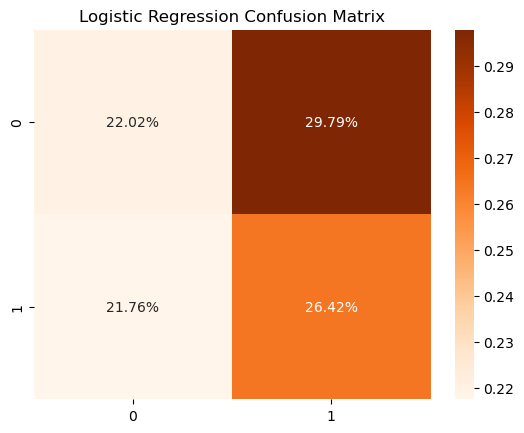

In [101]:
LogReg_cm = confusion_matrix(y_test, LogReg_pred)
sns.heatmap(LogReg_cm/np.sum(LogReg_cm), annot = True, fmt = '0.2%', cmap = 'Oranges')
plt.title('Logistic Regression Confusion Matrix')

**2. K-Nearest Neighbors Regression -- First Iteration**

In [102]:
KNN = KNeighborsClassifier()
KNN.fit(X_train, y_train)
KNN_pred = KNN.predict(X_test)
KNN_acc = accuracy_score(y_test, KNN_pred)
KNN_mae = mean_absolute_error(y_test, KNN_pred)
KNN_mse = mean_squared_error(y_test, KNN_pred)
KNN_rmse = np.sqrt(mean_squared_error(y_test, KNN_pred))
KNN_precision = precision_score(y_test, KNN_pred)
KNN_recall = recall_score(y_test, KNN_pred)
KNN_f1 = f1_score(y_test, KNN_pred)

In [103]:
print('The accuracy for KNeighbors is :', KNN_acc)
print('The Classification report using Logistic Regression is :')
print(classification_report(y_test, KNN_pred))

The accuracy for KNeighbors is : 0.6761658031088082
The Classification report using Logistic Regression is :
              precision    recall  f1-score   support

           0       0.72      0.62      0.66       400
           1       0.64      0.74      0.69       372

    accuracy                           0.68       772
   macro avg       0.68      0.68      0.68       772
weighted avg       0.68      0.68      0.68       772



Text(0.5, 1.0, 'KNN Regression Confusion Matrix')

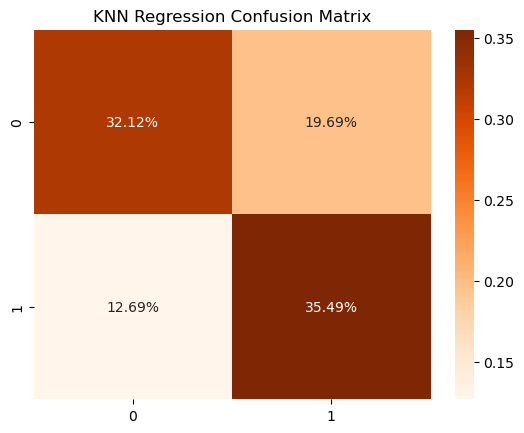

In [104]:
KNN_cm = confusion_matrix(y_test, KNN_pred)
sns.heatmap(KNN_cm/np.sum(KNN_cm), annot = True, fmt = '0.2%', cmap = 'Oranges')
plt.title('KNN Regression Confusion Matrix')

**3. Decision Tree Classifier -- First Iteration**

In [105]:
DecTree = DecisionTreeClassifier()
DecTree.fit(X_train, y_train)
DecTree_pred = DecTree.predict(X_test)
DecTree_acc = accuracy_score(y_test, DecTree_pred)
DecTree_precision = precision_score(y_test, DecTree_pred)
DecTree_recall = recall_score(y_test,DecTree_pred)
DecTree_f1 = f1_score(y_test,DecTree_pred)

print('The accuracy for Decision Tree is :', DecTree_acc)
print('The Classification report using Decision Tree is :')
print(classification_report(y_test, DecTree_pred))

The accuracy for Decision Tree is : 0.7707253886010362
The Classification report using Decision Tree is :
              precision    recall  f1-score   support

           0       0.84      0.69      0.76       400
           1       0.72      0.86      0.78       372

    accuracy                           0.77       772
   macro avg       0.78      0.77      0.77       772
weighted avg       0.78      0.77      0.77       772



Text(0.5, 1.0, 'Decision Tree Confusion Matrix')

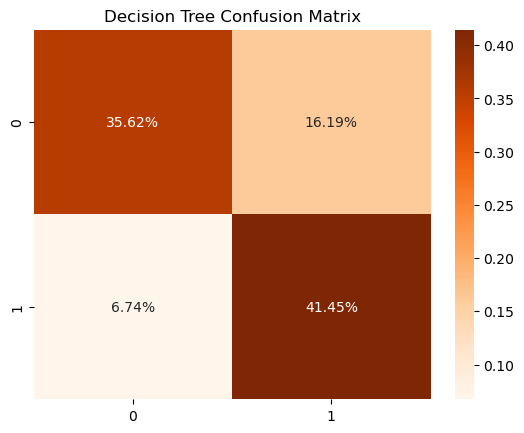

In [106]:
DecTree_cm = confusion_matrix(y_test, DecTree_pred)
sns.heatmap(DecTree_cm/np.sum(DecTree_cm), annot = True, fmt = '0.2%', cmap = 'Oranges')
plt.title('Decision Tree Confusion Matrix')

**4. Random Forest Classifier -- First Iteration**

In [107]:
RFTree = RandomForestClassifier()
RFTree.fit(X_train, y_train)
RFTree_pred = RFTree.predict(X_test)
RFTree_acc = accuracy_score(y_test, RFTree_pred)
RFTree_precision = precision_score(y_test, RFTree_pred)
RFTree_recall = recall_score(y_test, RFTree_pred)
RFTree_f1 = f1_score(y_test, RFTree_pred)

print('The accuracy for Random Forest is :', RFTree_acc)
print('The Classification report using Random Forest is :')
print(classification_report(y_test, RFTree_pred))

The accuracy for Random Forest is : 0.8419689119170984
The Classification report using Random Forest is :
              precision    recall  f1-score   support

           0       0.85      0.85      0.85       400
           1       0.84      0.83      0.84       372

    accuracy                           0.84       772
   macro avg       0.84      0.84      0.84       772
weighted avg       0.84      0.84      0.84       772



Text(0.5, 1.0, 'Random Forest Confusion Matrix')

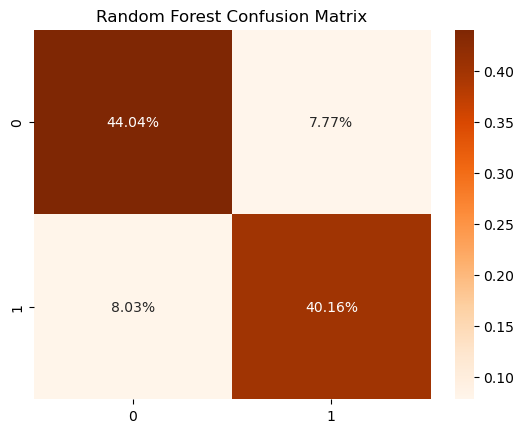

In [108]:
RFTree_cm = confusion_matrix(y_test, RFTree_pred)
sns.heatmap(RFTree_cm/np.sum(RFTree_cm), annot = True, fmt = '0.2%', cmap = 'Oranges')
plt.title('Random Forest Confusion Matrix')

**5. Support Vector Machine Classifier -- First Iteration**

In [109]:
SVM = SVC()
SVM.fit(X_train, y_train)
SVM_pred = SVM.predict(X_test)
SVM_acc = accuracy_score(y_test, SVM_pred)
SVM_precision = precision_score(y_test, SVM_pred)
SVM_recall = recall_score(y_test, SVM_pred)
SVM_f1 = f1_score(y_test, SVM_pred)

print('The accuracy for SVM is :', SVM_acc)
print('The Classification report using SVM is :')
print(classification_report(y_test, SVM_pred))

The accuracy for SVM is : 0.6722797927461139
The Classification report using SVM is :
              precision    recall  f1-score   support

           0       0.68      0.69      0.68       400
           1       0.66      0.66      0.66       372

    accuracy                           0.67       772
   macro avg       0.67      0.67      0.67       772
weighted avg       0.67      0.67      0.67       772



Text(0.5, 1.0, 'SVC Confusion Matrix')

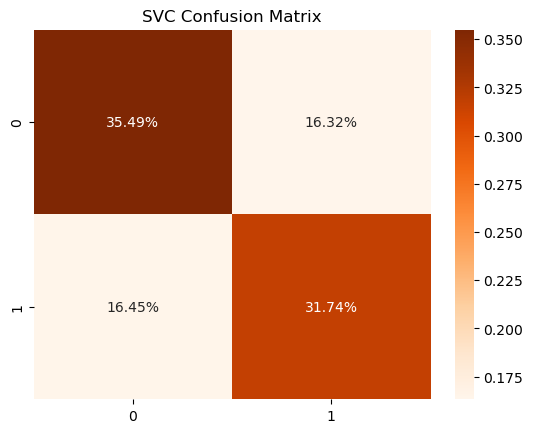

In [110]:
SVM_cm = confusion_matrix(y_test, SVM_pred)
sns.heatmap(SVM_cm/np.sum(SVM_cm), annot = True, fmt = '0.2%', cmap = 'Oranges')
plt.title('SVC Confusion Matrix')

**Algorithm Comparison -- First Iteration**

In [117]:
models = pd.DataFrame({
    'Model':['Logistic Regression','KNN Regression','Decision Tree','Random Forest','Support Vector'],
    'Accuracy':[LogReg_acc,KNN_acc,DecTree_acc,RFTree_acc,SVM_acc],
    'Precision':[LogReg_precision, KNN_precision, DecTree_precision, RFTree_precision, SVM_precision],
    'Recall':[LogReg_recall, KNN_recall, DecTree_recall, RFTree_recall, SVM_recall],
    'F1 Score':[LogReg_f1, KNN_f1, DecTree_f1, RFTree_f1, SVM_f1]
})

models = models.sort_values(by = 'Accuracy', ascending = False)
models

,Model,Accuracy,Precision,Recall,F1 Score
3,Random Forest,0.841969,0.837838,0.833333,0.835580
2,Decision Tree,0.770725,0.719101,0.860215,0.783354
1,KNN Regression,0.676166,0.643192,0.736559,0.686717
4,Support Vector,0.672280,0.660377,0.658602,0.659489
0,Logistic Regression,0.484456,0.470046,0.548387,0.506203


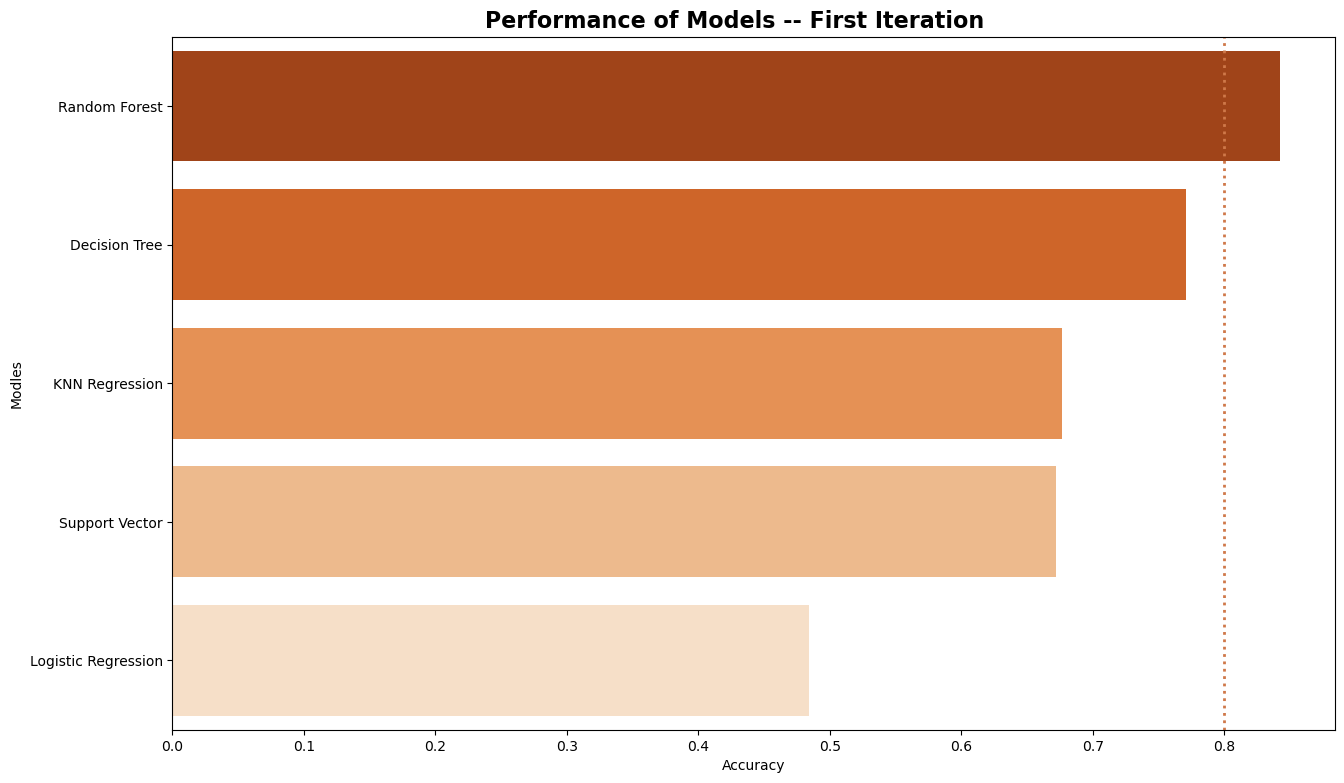

In [123]:
fig = plt.figure(figsize = (15,9))
ax = sns.barplot(data = models, y='Model', x = 'Accuracy', palette = 'Oranges_r')
ax.figure.suptitle('Performance of Models -- First Iteration', y=0.91, size = 16, color = 'black', weight = 'bold')
plt.xlabel('Accuracy')
plt.ylabel('Modles')
plt.axvline(x = 0.8, ymin =0, ymax = 1, linewidth = 2, linestyle = ":", color = "#cf7849")
plt.show()

After the first iteration of model training we can see that Logistic Regression performed the lowest while KNN, SVM had close accuracy values around 67%. Decision Tree Classifier had a 77% accuracy while Random Forest was able to be accurate to 84%.

**HyperParameter Tuning**

In [125]:
from sklearn.model_selection import RandomizedSearchCV, GridSearchCV

lgr = LogisticRegression()
knn = KNeighborsClassifier()
dt = DecisionTreeClassifier()
rf = RandomForestClassifier()
svc = SVC()

In [126]:
para_lgr = {'solver':['newton-cg', 'lbfgs', 'sag', 'saga', 'liblinear'], 'penalty':['l1', 'l2', 'elasticnet', 'none']}
grid_lgr = GridSearchCV(lgr, param_grid = para_lgr, cv = 5)
grid_lgr.fit(X_train, y_train)
print('Best parameters for Logistic Regression', grid_lgr.best_params_)

Best parameters for Logistic Regression {'penalty': 'l1', 'solver': 'saga'}


In [131]:
para_knn = {'n_neighbors':np.arange(1,50), 'weights':['uniform', 'distance'], 'algorithm':['auto', 'ball_tree', 'kd_tree']}
grid_knn = GridSearchCV(knn,param_grid = para_knn, cv = 5)
grid_knn.fit(X_train, y_train)
print('Best Parameters for KNN :', grid_knn.best_params_)

Best Parameters for KNN : {'algorithm': 'auto', 'n_neighbors': 36, 'weights': 'distance'}


In [132]:
para_dt = {'criterion':['gini','entropy'], 'max_depth':np.arange(1,50), 'min_samples_leaf':[1,2,4,5,10,20,30,40,80,100]}
grid_dt = GridSearchCV(dt, param_grid = para_dt, cv = 5)
grid_dt.fit(X_train, y_train)
print('Best Parameters for Decision Tree :', grid_dt.best_params_)

Best Parameters for Decision Tree : {'criterion': 'gini', 'max_depth': 34, 'min_samples_leaf': 1}


In [134]:
para_rf = {'n_estimators':[100,200,350,500], 'min_samples_leaf':[2,10,30]}
grid_rf = GridSearchCV(rf, param_grid = para_rf, cv = 5)
grid_rf.fit(X_train, y_train)
print('Best Parameters for Random Forest :', grid_rf.best_params_)

Best Parameters for Random Forest : {'min_samples_leaf': 2, 'n_estimators': 350}


In [135]:
para_svc = {'C':[0.1,1,10,100,1000], 'gamma':[1,0.1,0.01,0.001,0.0001],
           'kernel':['rbf']}
grid_svc = GridSearchCV(svc, param_grid = para_svc, cv = 5)
grid_svc.fit(X_train, y_train)
print('Best Parameters for SVM :', grid_svc.best_params_)

Best Parameters for SVM : {'C': 1, 'gamma': 1, 'kernel': 'rbf'}


**Predictive Modeling/Classification -- Second Iteration : After hyperparameter tuning.**

**1. Logistic Regression -- Second Iteration**

In [136]:
LogReg2 = LogisticRegression(penalty = 'l1', solver = 'saga')
LogReg2.fit(X_train, y_train)
LogReg2_pred = LogReg2.predict(X_test)
LogReg2_acc = accuracy_score(y_test, LogReg2_pred)
LogReg2_mae = mean_absolute_error(y_test, LogReg2_pred)
LogReg2_mse = mean_squared_error(y_test, LogReg2_pred)
LogReg2_rmse = np.sqrt(mean_squared_error(y_test, LogReg2_pred))
LogReg2_precision = precision_score(y_test, LogReg2_pred)
LogReg2_recall = recall_score(y_test, LogReg2_pred)
LogReg2_f1 = f1_score(y_test, LogReg2_pred)

In [137]:
print('The accuracy for LogisticRegression is :', LogReg2_acc)
print('The Classification report using Logistic Regression is :')
print(classification_report(y_test, LogReg2_pred))

The accuracy for LogisticRegression is : 0.48575129533678757
The Classification report using Logistic Regression is :
              precision    recall  f1-score   support

           0       0.50      0.43      0.46       400
           1       0.47      0.55      0.51       372

    accuracy                           0.49       772
   macro avg       0.49      0.49      0.48       772
weighted avg       0.49      0.49      0.48       772



Text(0.5, 1.0, 'Logistic Regression Confusion Matrix')

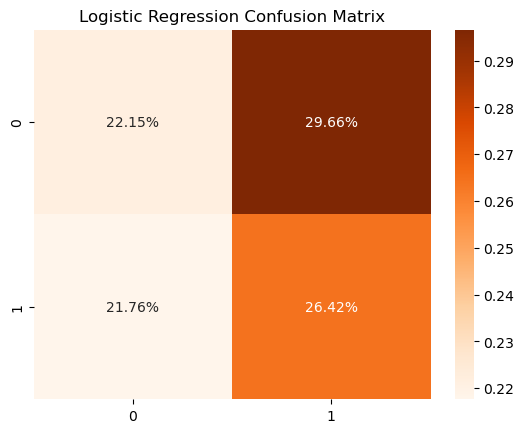

In [138]:
LogReg2_cm = confusion_matrix(y_test, LogReg2_pred)
sns.heatmap(LogReg2_cm/np.sum(LogReg2_cm), annot = True, fmt = '0.2%', cmap = 'Oranges')
plt.title('Logistic Regression Confusion Matrix')

**2. K-Nearest Neighbour Regression -- Second Iteration**

The accuracy for KNeighbors is : 0.7655440414507773
The Classification report using Logistic Regression is :
              precision    recall  f1-score   support

           0       0.85      0.66      0.74       400
           1       0.71      0.88      0.78       372

    accuracy                           0.77       772
   macro avg       0.78      0.77      0.76       772
weighted avg       0.78      0.77      0.76       772



Text(0.5, 1.0, 'KNN Regression Confusion Matrix')

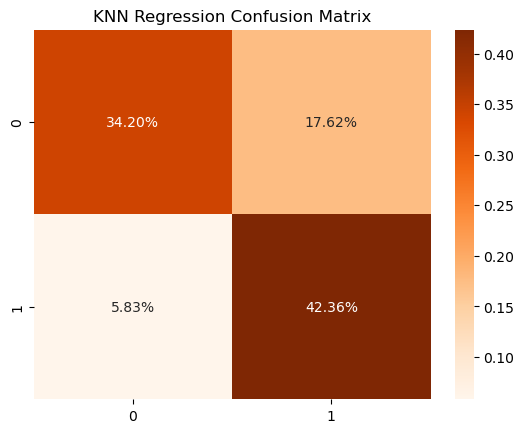

In [140]:
KNN2 = KNeighborsClassifier(algorithm = 'auto', n_neighbors = 36, weights = 'distance')
KNN2.fit(X_train, y_train)
KNN2_pred = KNN2.predict(X_test)
KNN2_acc = accuracy_score(y_test, KNN2_pred)
KNN2_mae = mean_absolute_error(y_test, KNN2_pred)
KNN2_mse = mean_squared_error(y_test, KNN2_pred)
KNN2_rmse = np.sqrt(mean_squared_error(y_test, KNN2_pred))
KNN2_precision = precision_score(y_test, KNN2_pred)
KNN2_recall = recall_score(y_test, KNN2_pred)
KNN2_f1 = f1_score(y_test, KNN2_pred)


print('The accuracy for KNeighbors is :', KNN2_acc)
print('The Classification report using Logistic Regression is :')
print(classification_report(y_test, KNN2_pred))


KNN2_cm = confusion_matrix(y_test, KNN2_pred)
sns.heatmap(KNN2_cm/np.sum(KNN2_cm), annot = True, fmt = '0.2%', cmap = 'Oranges')
plt.title('KNN Regression Confusion Matrix')

**3. Decision Tree Classifier -- Second Iteration**

The accuracy for Decision Tree is : 0.7668393782383419
The Classification report using Decision Tree is :
              precision    recall  f1-score   support

           0       0.82      0.70      0.76       400
           1       0.72      0.84      0.78       372

    accuracy                           0.77       772
   macro avg       0.77      0.77      0.77       772
weighted avg       0.77      0.77      0.77       772



Text(0.5, 1.0, 'Decision Tree Confusion Matrix')

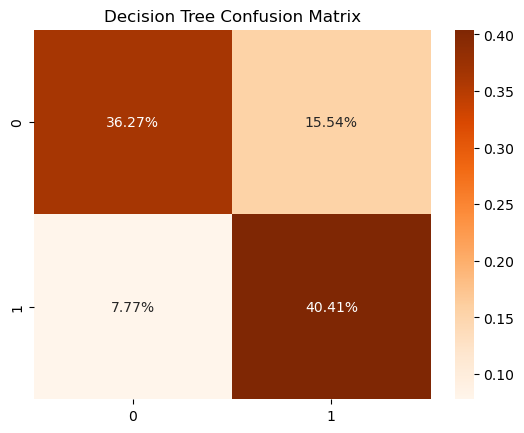

In [141]:
DecTree2 = DecisionTreeClassifier(criterion = 'gini', max_depth = 34, min_samples_leaf = 1)
DecTree2.fit(X_train, y_train)
DecTree2_pred = DecTree2.predict(X_test)
DecTree2_acc = accuracy_score(y_test, DecTree2_pred)
DecTree2_precision = precision_score(y_test, DecTree2_pred)
DecTree2_recall = recall_score(y_test,DecTree2_pred)
DecTree2_f1 = f1_score(y_test,DecTree2_pred)

print('The accuracy for Decision Tree is :', DecTree2_acc)
print('The Classification report using Decision Tree is :')
print(classification_report(y_test, DecTree2_pred))

DecTree2_cm = confusion_matrix(y_test, DecTree2_pred)
sns.heatmap(DecTree2_cm/np.sum(DecTree2_cm), annot = True, fmt = '0.2%', cmap = 'Oranges')
plt.title('Decision Tree Confusion Matrix')

**4. Random Forest Classifier -- Second Iteration**

The accuracy for Random Forest is : 0.8316062176165803
The Classification report using Random Forest is :
              precision    recall  f1-score   support

           0       0.84      0.83      0.84       400
           1       0.82      0.83      0.83       372

    accuracy                           0.83       772
   macro avg       0.83      0.83      0.83       772
weighted avg       0.83      0.83      0.83       772



Text(0.5, 1.0, 'Random Forest Confusion Matrix')

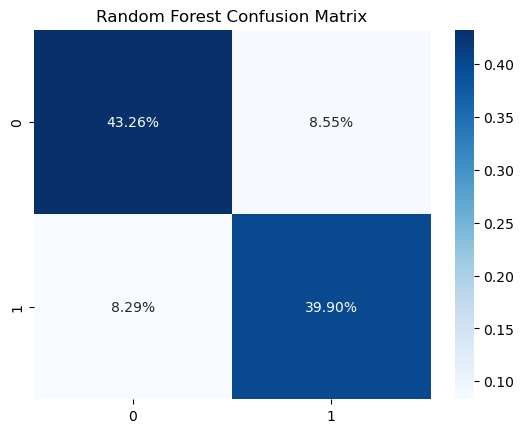

In [142]:
RFTree2 = RandomForestClassifier(min_samples_leaf = 2, n_estimators = 350)
RFTree2.fit(X_train, y_train)
RFTree2_pred = RFTree2.predict(X_test)
RFTree2_acc = accuracy_score(y_test, RFTree2_pred)
RFTree2_precision = precision_score(y_test, RFTree2_pred)
RFTree2_recall = recall_score(y_test, RFTree2_pred)
RFTree2_f1 = f1_score(y_test, RFTree2_pred)

print('The accuracy for Random Forest is :', RFTree2_acc)
print('The Classification report using Random Forest is :')
print(classification_report(y_test, RFTree2_pred))

RFTree2_cm = confusion_matrix(y_test, RFTree2_pred)
sns.heatmap(RFTree2_cm/np.sum(RFTree2_cm), annot = True, fmt = '0.2%', cmap = 'Blues')
plt.title('Random Forest Confusion Matrix')

**5. Support Vector Machine Classifier -- Second Iteration**

The accuracy for SVM is : 0.8393782383419689
The Classification report using SVM is :
              precision    recall  f1-score   support

           0       0.81      0.90      0.85       400
           1       0.88      0.77      0.82       372

    accuracy                           0.84       772
   macro avg       0.84      0.84      0.84       772
weighted avg       0.84      0.84      0.84       772



Text(0.5, 1.0, 'SVC Confusion Matrix')

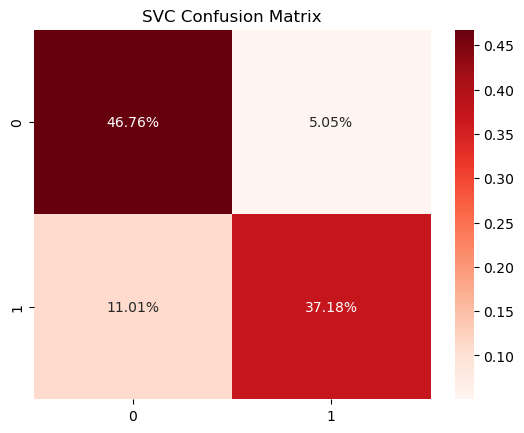

In [145]:
SVM2 = SVC(C = 1, gamma = 1, kernel = 'rbf')
SVM2.fit(X_train, y_train)
SVM2_pred = SVM2.predict(X_test)
SVM2_acc = accuracy_score(y_test, SVM2_pred)
SVM2_precision = precision_score(y_test, SVM2_pred)
SVM2_recall = recall_score(y_test, SVM2_pred)
SVM2_f1 = f1_score(y_test, SVM2_pred)

print('The accuracy for SVM is :', SVM2_acc)
print('The Classification report using SVM is :')
print(classification_report(y_test, SVM2_pred))

SVM2_cm = confusion_matrix(y_test, SVM2_pred)
sns.heatmap(SVM2_cm/np.sum(SVM2_cm), annot = True, fmt = '0.2%', cmap = 'Reds')
plt.title('SVC Confusion Matrix')

**Algorithm Comparison -- Second Iteration**

In [146]:
models2 = pd.DataFrame({
    'Model':['Logistic Regression','KNN Regression','Decision Tree','Random Forest','Support Vector'],
    'Accuracy':[LogReg2_acc,KNN2_acc,DecTree2_acc,RFTree2_acc,SVM2_acc],
    'Precision':[LogReg2_precision, KNN2_precision, DecTree2_precision, RFTree2_precision, SVM2_precision],
    'Recall':[LogReg2_recall, KNN2_recall, DecTree2_recall, RFTree2_recall, SVM2_recall],
    'F1 Score':[LogReg2_f1, KNN2_f1, DecTree2_f1, RFTree2_f1, SVM2_f1]
})

models2 = models2.sort_values(by = 'Accuracy', ascending = False)
models2

,Model,Accuracy,Precision,Recall,F1 Score
4,Support Vector,0.839378,0.880368,0.771505,0.822350
3,Random Forest,0.831606,0.823529,0.827957,0.825737
2,Decision Tree,0.766839,0.722222,0.838710,0.776119
1,KNN Regression,0.765544,0.706263,0.879032,0.783234
0,Logistic Regression,0.485751,0.471132,0.548387,0.506832


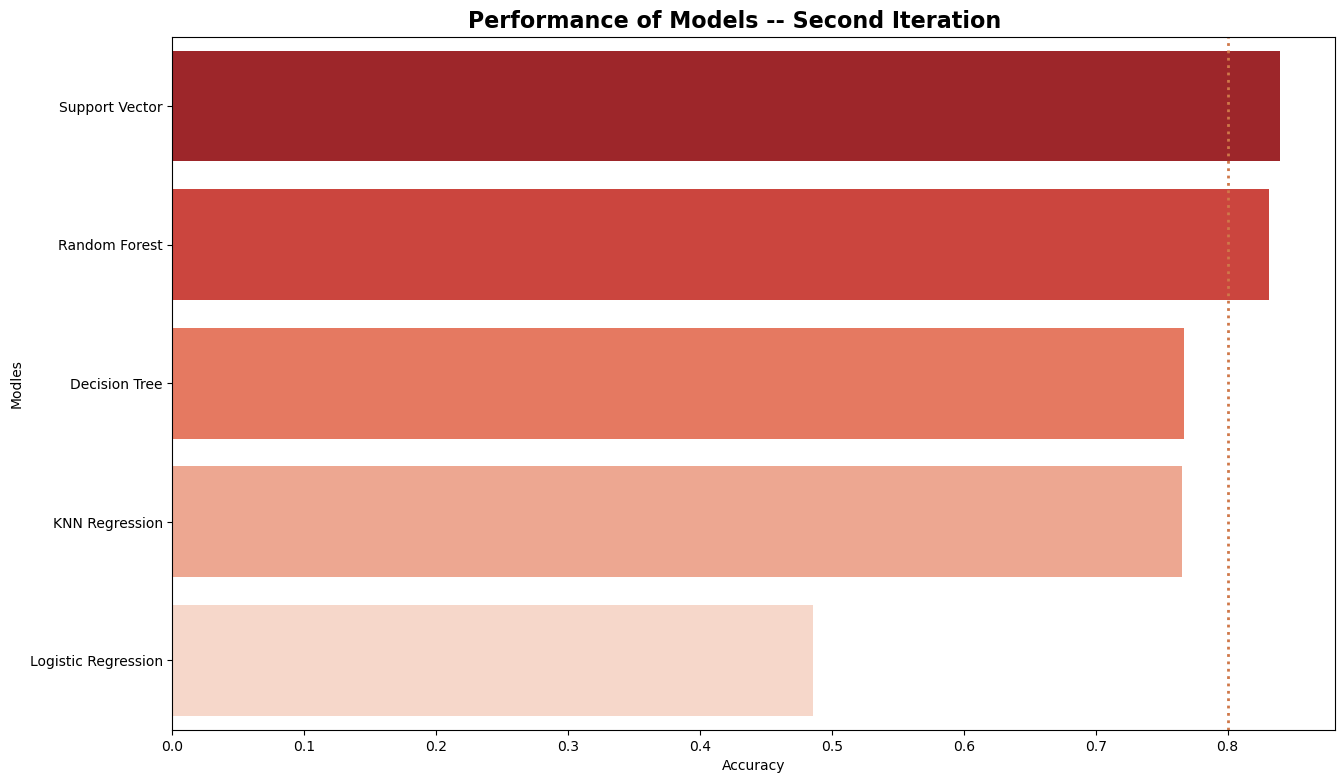

In [147]:
fig = plt.figure(figsize = (15,9))

ax = sns.barplot(data = models2, y='Model', x = 'Accuracy', palette = 'Reds_r')

ax.figure.suptitle('Performance of Models -- Second Iteration', 
                   y=0.91, size = 16, color = 'black', weight = 'bold')

plt.xlabel('Accuracy')
plt.ylabel('Modles')
plt.axvline(x = 0.8, ymin =0, ymax = 1, linewidth = 2, 
            linestyle = ":", color = "#cf7849")
plt.show()

**Comparison First and Second Iteration**

In [152]:
comp_iteration = pd.DataFrame({
    'Model':['Logistic Regression','KNN Regression','Decision Tree','Random Forest','Support Vector'],
    '2nd Iteration':[LogReg2_acc,KNN2_acc,DecTree2_acc,RFTree2_acc,SVM2_acc],
    '1st Iteration':[LogReg_acc,KNN_acc,DecTree_acc,RFTree_acc,SVM_acc],
    })
comp_iteration

,Model,2nd Iteration,1st Iteration
0,Logistic Regression,0.485751,0.484456
1,KNN Regression,0.765544,0.676166
2,Decision Tree,0.766839,0.770725
3,Random Forest,0.831606,0.841969
4,Support Vector,0.839378,0.672280


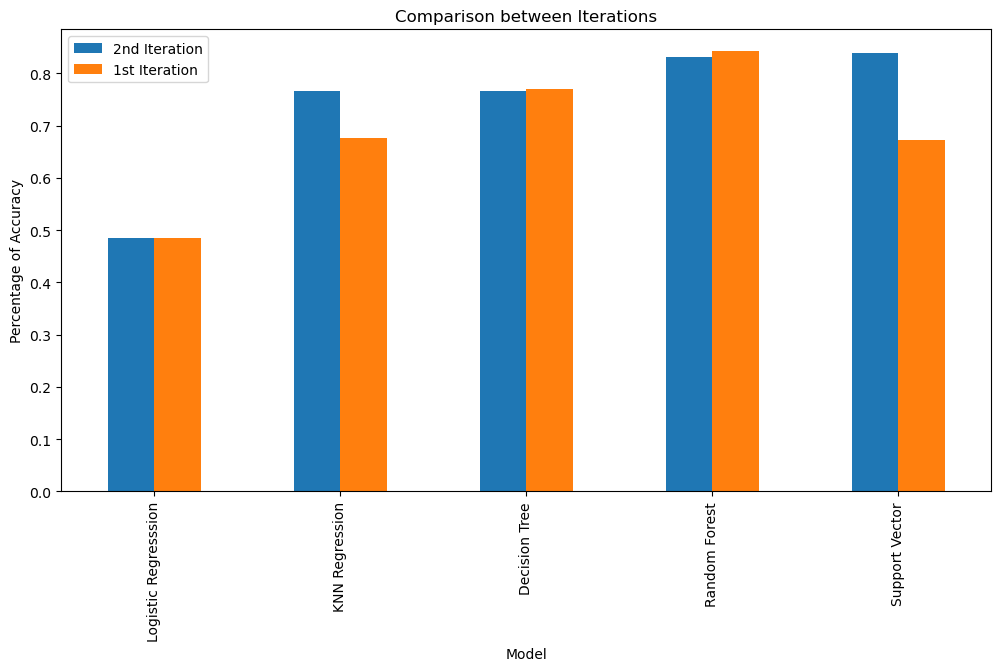

In [155]:
comp_iteration.plot.bar(figsize = (12,6))
plt.xticks([0,1,2,3,4], ['Logistic Regresssion', 'KNN Regression', 'Decision Tree', 'Random Forest', 'Support Vector'])
plt.ylabel('Percentage of Accuracy')
plt.xlabel('Model')
plt.title('Comparison between Iterations');

After our second iteration of model(with hypertuning) we can see that Random Forest Classifier performed the best with the highest accuracy. Now we will use Random Forest and SVM to continue our model evaluation with cross validation.

**Cross Validation**

In [156]:
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score
from statistics import mean, stdev

cv = KFold(n_splits = 10, random_state = 1, shuffle = True)

RFTree2_scores = cross_val_score(RFTree2, X, y, scoring = 'accuracy', cv = cv, n_jobs = -1)
SVM2_scores = cross_val_score(SVM2, X, y, scoring = 'accuracy', cv = cv, n_jobs = -1)

print('Accuracy of CV - Random Forest: %.4f (%.4f)' % (mean(RFTree2_scores), stdev(RFTree2_scores)))
print('Accuracy of CV - SVM: %.4f (%.4f)' % (mean(SVM2_scores), stdev(SVM2_scores)))

Accuracy of CV - Random Forest: 0.8630 (0.0147)
Accuracy of CV - SVM: 0.8850 (0.0172)


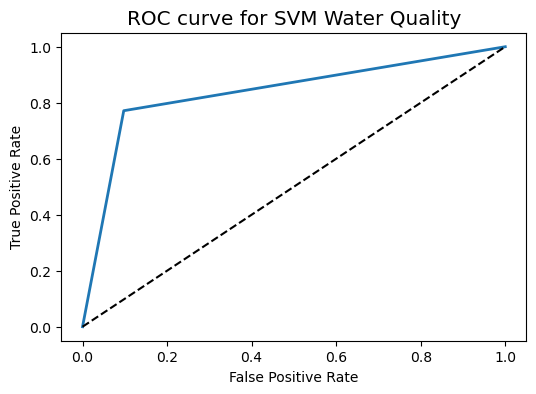

In [157]:
from sklearn.metrics import roc_curve

fpr, tpr, thresholds = roc_curve(y_test, SVM2_pred)

plt.figure(figsize = (6,4))
plt.plot(fpr, tpr, linewidth = 2)
plt.plot([0,1], [0,1], 'k--')
plt.rcParams['font.size'] = 12
plt.title('ROC curve for SVM Water Quality')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.show()

In [158]:
from sklearn.metrics import roc_auc_score
ROC_AUC = roc_auc_score(y_test, SVM2_pred)
print('ROC AUC : {:.4f}'.format(ROC_AUC))

ROC AUC : 0.8370


In [159]:
Cross_validated_ROC_AUC = cross_val_score(SVM2, X_train, y_train, cv = 10, scoring = 'roc_auc').mean()

print('Cross validated ROC AUC : {:.4f}'.format(Cross_validated_ROC_AUC))

Cross validated ROC AUC : 0.8795
